<p><img alt="Colaboratory logo" height="45px" src="/img/colab_favicon.ico" align="left" hspace="10px" vspace="0px"></p>

<h1>Islamic Medicine Engine Based Al-Qur'an & Hadith using meta Deep AI PSO</h1>


In [2]:
# ============================
# By: Imam Cholissodin | imamcs@ub.ac.id
# Dosen Fakultas Ilmu Komputer (Filkom)
# Universitas Brawijaya (UB)
# Tgl 5 November 2020, 
# Semoga Bermanfaat. Aamiin :D
# ====================================

# Kode Program v1.04: 
# Prototype Islamic Medicine Engine Based Al-Qur'an & Hadith using meta Deep AI PSO
# 
# The 2nd International Conferences on Engineering, Technology and Social Science (ICONETOS 2020), 
# “Interdisciplinary Synergy in the COVID-19 Era: A Scientific Perspective”, 

# Malang October 31st 2020, Online seminar (di Zoom)
# 

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Buat Folder, misal "Prototype_Islamic_Medicine_Engine_For_Covid_19" di Gdrive
import os
os.chdir("/content/drive/My Drive")
if not os.path.exists('Prototype_Islamic_Medicine_Engine_For_Covid_19'):
  os.makedirs('Prototype_Islamic_Medicine_Engine_For_Covid_19')
  #print('Path blm ada')
else:
  print('Path sdh ada')
os.chdir("/content/drive/My Drive/Prototype_Islamic_Medicine_Engine_For_Covid_19")
!pwd

file_input  	= '/content/drive/My Drive/Prototype_Islamic_Medicine_Engine_For_Covid_19/dataset.csv'
dir_output 	= '/content/drive/My Drive/Prototype_Islamic_Medicine_Engine_For_Covid_19/'

!ls -l -a --block-size=K

# link dataset v0.0.1 di Gdrive
# https://drive.google.com/drive/folders/1Xq78OTcH0-eUS3MgsRcxKY5wiOPWLeKA?usp=sharing

Path sdh ada
/content/drive/My Drive/Prototype_Islamic_Medicine_Engine_For_Covid_19
total 41K
-rw------- 1 root root 11K Nov  5 05:20 dataset.csv
-rw------- 1 root root 30K Nov  5 05:20 dataset-v0.0.1.xlsx


In [ ]:
#!pip install mpu

In [4]:
# Read CSV file
# with open(file_input) as fp:
#     #reader = csv.reader(fp, delimiter=",", quotechar='"')
#     reader = csv.reader(fp, delimiter=",")
#     # next(reader, None)  # skip the headers
#     data_read = [row for row in reader]
# print(data_read)

# import mpu.io
# data = mpu.io.read(file_input, delimiter=',', quotechar='"', skiprows=None)

import pandas as pd
raw_df = pd.read_excel("dataset-v0.0.1.xlsx", sheet_name="Sheet1")
print(raw_df.head(10))

   No  ...   Referensi Ayat ke .. atau HR ... di kitab apa ..
0   1  ...  HR. Bukhori no 5688 ( kitab shohih Bukhori) HR...
1   2  ...  QS. An-Nahl (16) 68-69 HR. Bukhari no. 5684 ( ...
2   3  ...  HR. Tirmidi Sunan  Tirmidzi 1851  ( kitab Tibb...
3   4  ...  Syarah Shohih Bukhari Kitab: Pengobatan Bab : ...
4   5  ...  Ibnul Qoyimm Al-Jauzi, Zadul Maad bab Thibun N...
5   6  ...  ibnul Qoyimm Al-Jauzi, Zadul Maad juz 4 hal. 3...
6   7  ...  al- Hafidz Abi Abdillah muhammad bin Ahmad a- ...
7   8  ...                                     QS Al-Insan:17
8   9  ...  Ali ibn Abu Bakr al-Haythami Majma' az-Zawaid ...
9  10  ...                                                NaN

[10 rows x 5 columns]


In [65]:
#Hapus df yang tidak ada referensi dari Qur'an dan Hadist, yaitu yang bernilai kososng atau null atau nan
df_clean = raw_df.dropna(axis=0, subset=['Referensi Ayat ke .. atau HR ... di kitab apa ..'])
print(df_clean)

    No  ...   Referensi Ayat ke .. atau HR ... di kitab apa ..
0    1  ...  HR. Bukhori no 5688 ( kitab shohih Bukhori) HR...
1    2  ...  QS. An-Nahl (16) 68-69 HR. Bukhari no. 5684 ( ...
2    3  ...  HR. Tirmidi Sunan  Tirmidzi 1851  ( kitab Tibb...
3    4  ...  Syarah Shohih Bukhari Kitab: Pengobatan Bab : ...
4    5  ...  Ibnul Qoyimm Al-Jauzi, Zadul Maad bab Thibun N...
5    6  ...  ibnul Qoyimm Al-Jauzi, Zadul Maad juz 4 hal. 3...
6    7  ...  al- Hafidz Abi Abdillah muhammad bin Ahmad a- ...
7    8  ...                                     QS Al-Insan:17
8    9  ...  Ali ibn Abu Bakr al-Haythami Majma' az-Zawaid ...
10  11  ...  “Rasulullah SAW pernah menemukan seorang laki-...
12  13  ...  al- Hafidz Abi Abdillah muhammad bin Ahmad a- ...
14  15  ...  Nabi Yunus dan Labu “Maka dia ditelan ikan bes...
15  16  ...  Syaikh Abu Al Ula Muhammad Abdurrahman bin Abd...
16  17  ...                                  QS. Al-Baqorah:61

[14 rows x 5 columns]


In [93]:
# memilih kolom untuk pengolahan data utama, yaitu kolom 
# idx 1 > "Nama Herbal di Al-Qur'an atau di Hadist", diberikan alias "Herb"
# idx 2 > "Dapat Mengobati Gejala atau Sakit Apa Saja"
# idx 3 > "Manfaat tambahn yg di Sebukan dari Web atau Sumber Lainnya"
#
# utk idx 2 dan idx 3 dimerger jadi satu, diberikan alias, "Key"

# df_main = df_clean[['a', 'b']]
df_main = df_clean.iloc[:, 1:4].copy()
print(df_main)

print()

# Membuat merger idx 2 dan idx 3, lalu me-rename nama kolom menjadi alias "Key"
df_main_alias = df_main.copy()
# df_main_alias.iloc[:,1] = df_clean.iloc[:,2] +', '+ df_clean.iloc[:,3]

# df_main_alias.iloc[:,1].update(df_main_alias.iloc[:,2])

df_main_alias.columns = ['Herb', 'Keys1', 'Keys2']

# print()
# print(df_main_alias['Keys2'])

# df_main_alias.iloc[:,1] = df_clean.iloc[:,2:3].apply(lambda x: ','.join(x), axis=1)

# df_main_alias['Keys'] = df_main_alias[['Keys1', 'Keys2']].apply(lambda x: ','.join(str(x)), axis=1)

df_main_alias['Keys']=df_main_alias['Keys1'].fillna('_') + ', ' + df_main_alias['Keys2'].fillna('_')

# df_main_alias['period'] = df_main_alias[['Year', 'quarter']].apply(lambda x: ','.join(x), axis=1)
# df_main_alias = df_main_alias.drop(df_main_alias.columns[[0, 1, 2]], axis=1) 

df_main_alias = df_main_alias.drop(df_main_alias.columns[[1,2]], axis=1) 
df_main_alias = df_main_alias.reset_index(drop=True)

df_main_alias.columns = ['Herb', 'Keys']

# df_main_alias.str.lower()
# df_main_alias = df_main_alias['Herb','Keys'].apply(lambda x: x.lower())
df_main_alias = df_main_alias.apply(lambda x: x.astype(str).str.lower())


df_main_alias['Keys'] = df_main_alias['Keys'].map(lambda x: x.lstrip('_, ').rstrip(', _'))

# print(df_main_alias.iloc[:,0])
print()
# print(df_main_alias.iloc[:,1])
print()
print(df_main_alias)
# print(df_main_alias.iloc[:,2])
print()
print(df_main_alias.iloc[10,1])
print(df_main_alias.iloc[13,1])

              Nama Herbal di Al-Qur'an atau di Hadist  ... Manfaat tambahn yg di Sebukan dari Web atau Sumber Lainnya
0                                        Jintan Hitam  ...  Menetralisir racun, nutrisi bagi ibu hamil dan...        
1                                                Madu  ...                  mengobati luka-luka luar di tubuh        
2                                   Minyak Kayu Putih  ...                                                NaN        
3   Dahan Kayu India (Kayu Gaharu/ Kemenyan/ Dupa ...  ...                                                NaN        
4                                              Kismis  ...                                                NaN        
5                                               Kurma  ...  Infeksi, darah tinggi, menjadi metabolisme ala...        
6                                              Delima  ...  batuk, menteralisir perut, memperbaiki pencern...        
7                                     Jahe (Zanjabil)  .

In [100]:
# !pip install nltk

In [160]:
import nltk
# nltk.download('punkt')
import string

# tokenisasi Keys
df_token = df_main_alias.copy()
print(df_token)
print()

# df_token['Keys'] = df_token['Keys'].map(lambda x: x.strip(','))
df_token['Keys'] = df_token['Keys'].replace(',', ' ', regex=True)
df_token['Keys'] = df_token['Keys'].replace(r"\(", ' ', regex=True)
df_token['Keys'] = df_token['Keys'].replace(r"\)", ' ', regex=True)
# df_token['Keys'] = df_token['Keys'].replace(r"\-", '', regex=True)
df_token['Keys'] = df_token['Keys'].replace(" di ", ' ', regex=True)
df_token['Keys'] = df_token['Keys'].replace(" dan ", ' ', regex=True)
df_token['Keys'] = df_token['Keys'].replace(" dari ", ' ', regex=True)
df_token['Keys'] = df_token['Keys'].replace(" bagi ", ' ', regex=True)
df_token['Keys'] = df_token['Keys'].replace(" atau ", ' ', regex=True)
df_token['Keys'] = df_token['Keys'].replace("berbagai", ' ', regex=True)
df_token['Keys'] = df_token['Keys'].replace("menyehatakn", 'menyehatkan', regex=True)


# df_token['Keys'] = df_token['Keys'].replace(r"\(.*\)","")
# df_token['Keys'] = df_token['Keys'].replace(r"\s*\([^()]*\)","").str.strip()

# df_token['Keys'] = df_token['Keys'].apply(lambda x: x.replace(r"\s*\([^()]*\)",""))

# df_token['Keys'] = df_token['Keys'].replace('[{}]'.format(string.punctuation), '')

# df_token['Keys'] = df_token['Keys'].unique()
# df_token['Keys'].str.split(' \s*', expand=True).stack().unique()

# distinct token
df_token['Keys'] = df_token['Keys'].apply(lambda x: ' '.join(set(x.split(' '))))

# lakukan tokenisasi
df_token['Keys'] = df_token.apply(lambda row: nltk.word_tokenize(row['Keys']), axis=1)
print(df_token)
print(df_token.iloc[1,1])
print(df_token.iloc[13,1])

print()

# df_token['Keys'] = df_token['Keys'].unique()
# print(df_token)

                                                 Herb                                               Keys
0                                        jintan hitam  semua penyakit, meningkatkan imun, daya ingat,...
1                                                madu  obat dari berbagai penyakit, mengobati luka-lu...
2                                   minyak kayu putih  masuk angin, sakit kepala, pilek flu, nyeri ot...
3   dahan kayu india (kayu gaharu/ kemenyan/ dupa ...  gangguan sistem pernafasan, penyakit tenggorok...
4                                              kismis  menghilangkan capek capek, mengencangkan syara...
5                                               kurma  penawar racun di tubuh, infeksi, darah tinggi,...
6                                              delima  membersihkan hati, membersihkan perut, lambung...
7                                     jahe (zanjabil)  gangguan hati, vitalitas pria, gastritis pada ...
8                                       minyak zaitun  

In [196]:
# User memasukkan nama gejala
# gejala = 'masuk angin', 'gangguan sistem pernafasan'
gejala = ['masuk angin', 'gangguan sistem pernafasan']
# print(gejala.translate(None,"[]'").split(','))
# flatten(gejala)



In [ ]:
# !pip install fuzzywuzzy
# !pip install python-Levenshtein

In [202]:
from fuzzywuzzy import process, fuzz

# process.extract('kancer', df_token.iloc[13,1], scorer=fuzz.token_sort_ratio)
print()
score_sort = process.extract('masuk angin', df_token.iloc[13,1], scorer=fuzz.token_set_ratio)
print(score_sort)


[('anti', 40), ('radang', 35), ('kanker', 35), ('oksidan', 22)]


In [178]:
print(score_sort[0][1])

83


In [206]:
sum([x[1] for x in score_sort if x[1] > 35])

40

In [203]:
len(score_sort)

4

In [210]:
# User memasukkan nama gejala
# gejala = 'masuk angin', 'gangguan sistem pernafasan'
gejala = ['masuk angin', 'gangguan sistem pernafasan']

# hitung fitness X[0] = [1 0 1 0 0 0 0 0 1 0 1 0 0 0]
theshold_score = 70
print(X[0])
init_fitness = 0
for i in range(len(gejala)):
  print(i)
  for j in range(14):
    if X[0][j] ==1:
      print('--',j)
      score_sort = process.extract(gejala[i], df_token.iloc[j,1], scorer=fuzz.token_set_ratio)
      init_fitness += sum([x_[1] for x_ in score_sort if x_[1] > theshold_score])
fitness = init_fitness
print(fitness)

[1 0 1 0 0 0 0 0 1 0 1 0 0 0]
0
-- 0
-- 2
-- 8
-- 10
1
-- 0
-- 2
-- 8
-- 10
200


In [ ]:
score_sort = [(x,) + i
             for x in unique_brand 
             for i in process.extract(x, unique_brand,     scorer=fuzz.token_sort_ratio)]

In [184]:
X = myrandfloat(2,14,0,1).round(0).astype(np.int)
print(len(X[0]))

14


In [213]:
import os
import numpy as np
import math
import matplotlib.pyplot as plt
from matplotlib import style
import humanize
from datetime import datetime, timezone
from time import gmtime, strftime
import pytz
import csv
from itertools import zip_longest
import random

#Set nilai parameter
panjang_bit = 14
gejala = ['masuk angin', 'gangguan sistem pernafasan']

def myrandfloat(mbaris,nkolom,lower,upper):
  #BatasRANDplusOne=10000
  BatasRANDplusOne=max(10000,2*np.math.ceil(upper))
  #mbaris=1
  #nkolom=1
  Rand_Sample=np.random.randint(BatasRANDplusOne,size=(mbaris,nkolom))
  min_Rand_Sample = 0
  max_Rand_Sample = BatasRANDplusOne - 1
  upper_boundary= upper
  lower_boundary= lower
  normalize_Rand_Sample_minMax=(((Rand_Sample-min_Rand_Sample)/(max_Rand_Sample-min_Rand_Sample))*(upper_boundary-lower_boundary))+lower_boundary
  return normalize_Rand_Sample_minMax


def flatten(A):
    rt = []
    for i in A:
        if isinstance(i,list): rt.extend(flatten(i))
        else: rt.append(i)
    return rt

def bool2int(x):
    y = 0
    len_ = len(x)
    for i,j in enumerate(x):
        y += j*(2**(len_ - (i+1)))
    return y

def Hitung_Fitness(np_partikel):
  # hitung fitness
  # -x2+14x–13
  #x = bool2int(np_partikel)
  #fitness = -(x**2) + 14*x - 13
  theshold_score = 70
  #print(X[0])
  #X[0] = np_partikel.copy()
  init_fitness = 0
  for i in range(len(gejala)):
    #print(i)
    for j in range(14):
      if np_partikel[j] ==1:
        #print('--',j)
        score_sort = process.extract(gejala[i], df_token.iloc[j,1], scorer=fuzz.token_set_ratio)
        init_fitness += sum([x_[1] for x_ in score_sort if x_[1] > theshold_score])
  fitness = init_fitness
  #print(fitness)


  return fitness

def FnGetFitnessIPSODL(X_or_P_or_G):
  # pop_size=size(X_or_P_or_G,1);
  pop_size = X_or_P_or_G.shape[0]
  # Fitness=zeros(pop_size,1);
  Fitness = myrandfloat(pop_size,1,0,0).flatten()

  # for i=1:pop_size
  for i in range(pop_size):
    # Fitness[i]=1/FnArsitekPSODLCNNeLM(X_or_P_or_G(i,:))
    Fitness[i] = Hitung_Fitness(X_or_P_or_G[i])

  # % mencari indexsorting secara descending
  IndexAwal = myrandfloat(pop_size,1,0,0).astype('int64').flatten()
  for i in range(pop_size):
    IndexAwal[i] = i

  FitnessAwal= Fitness.copy()

  for i in range(pop_size):
    TempNilaiFx = Fitness[i].copy()
    TempIndexAwal = IndexAwal[i].copy()
    # for j=i+1:pop_size
    for j in range(i+1,pop_size):
      if (Fitness[j] > TempNilaiFx):
        TempNilaiFx = Fitness[j].copy()
        Fitness[j] = Fitness[i].copy()
        Fitness[i] = TempNilaiFx.copy()
        TempIndexAwal = IndexAwal[j].copy()
        IndexAwal[j] = IndexAwal[i].copy()
        IndexAwal[i] = TempIndexAwal.copy()

  # %[FitnessAwal Fitness];
  # %IndexAwal;

  IndexSortingDesc = IndexAwal.copy()
  return FitnessAwal,IndexSortingDesc

def FnGetFitnessNbestIndividuIPSODL(X_or_P_or_G):
  # pop_size=size(X_or_P_or_G,1);
  pop_size = X_or_P_or_G.shape[0]
  # Best_Partikel=zeros(1,size(X_or_P_or_G,2));

  # FitnessAll=zeros(pop_size,1);
  FitnessAll = myrandfloat(pop_size,1,0,0).flatten()

  for i in range(pop_size):
    FitnessAll[i] = Hitung_Fitness(X_or_P_or_G[i])

  # % mengambil X_or_P_or_G yang fitness-nya terbaik
  FitnessGbest = max(FitnessAll)
  index_Gbest = np.argmax(FitnessAll)
  Gbest = X_or_P_or_G[index_Gbest].copy()

  return FitnessAll,FitnessGbest,Gbest

def FnUpdatePbestGbestIPSODL(FitnessAllPbestOld,FitnessAllXbaru,FitnessGbestOld,Xbaru,PbestOld,GbestOld):
  Update_Pbest = PbestOld.copy()
  FitnessAll_Update_Pbest = FitnessAllPbestOld.copy()

  FitnessAllPbestOld_minus_FitnessAllXbaru = \
  FitnessAllPbestOld-FitnessAllXbaru

  # % jika nilai selisih negatif, maka nilai Fitness pada Xbaru lebih besar
  # % mencari indek yang nilai selisihnya negatif
  idx_selisih_negatif = np.where(FitnessAllPbestOld_minus_FitnessAllXbaru<0)

  # idx_find_neg = np.where(a5 < 0)
  # print(np.array(idx_selisih_negatif).shape[1])

  if(np.array(idx_selisih_negatif).shape[1] > 0):
    Update_Pbest[idx_selisih_negatif] = Xbaru[idx_selisih_negatif].copy()
    FitnessAll_Update_Pbest[idx_selisih_negatif] = FitnessAllXbaru[idx_selisih_negatif].copy()

  # % mencari nilai_MaxFitness dan indexnya dari FitnessAll_Update_Pbest
  nilai_MaxFitness,index_MaxFitness=max(FitnessAll_Update_Pbest),np.argmax(FitnessAll_Update_Pbest)
  Calon_Gbest = Update_Pbest[index_MaxFitness].copy()

  # idx,value = np.argmax(a5),max(a5)

  FitnessCalon_Gbest = nilai_MaxFitness.copy()

  # % membandingkan Calon_Gbest dengan GbestOld dari nilai fitness-nya
  if(FitnessCalon_Gbest>FitnessGbestOld):
    Fitness_Update_Gbest = FitnessCalon_Gbest.copy()
    Update_Gbest = Calon_Gbest.copy()
  else:
    Fitness_Update_Gbest = FitnessGbestOld.copy()
    Update_Gbest = GbestOld.copy()

  return FitnessAll_Update_Pbest,Fitness_Update_Gbest,Update_Pbest,Update_Gbest

def FnMyIPSO_DLeLM_UjiKonv(IterMaxPSO,pop_size,panjang_bit):

  # %% Tentang PTVPSO (Chen, Hui, Ling, at all, 2011)
  # % Algoritma particle swarm optimization (PSO) 
  # % merupakan algoritma optimasi yang pertama kali dikenalkan oleh Kennedy 
  # % dan Eberhart pada tahun 1995.
  # % 
  # % Time variant yang digunakan adalah 
  # % time varying acceleration coefficients (TVAC) dan 
  # % time varying inertia weight (TVIW) Dimana,
  # % TVIW (wmin = 0.4 dan wmax = 0.9) 
  # % Nilai range c1 dan c2 (TVAC) yang digunakan adalah 
  # % (c1i=2.5, c1f=0.5) dan c2i=0.5, c2f=2.5) karena terbukti optimal. 
  # % c1 dan c2 (cognitive dan social components).
  # % w (bobot inersia), d (banyaknya dimensi data, 
  # % atau banyaknya fitur data), tmax (iterasi max.)
  # % ----------------------------------------------------------------------

  # %% koding PSO
  # % ========================================
  wmin=0.4
  wmax=0.9
  c1i=2.5 
  c1f=0.5
  c2i=0.5
  c2f=2.5
  tmax = IterMaxPSO

  # byk_dim_data_input = 10
  # %% Batas Bawah dan Batas Atas Parameter yang dioptimasi, untuk X
  # SLCcLR_lower = [k_padding_lower FC1_Wjk_lower FC2_Wjk_lower FC3_Wjk_lower];
  # SLCcLR_upper = [k_padding_upper FC1_Wjk_upper FC2_Wjk_upper FC3_Wjk_upper];

  SLCcLR_lower = myrandfloat(panjang_bit,1,0,0).flatten()
  SLCcLR_upper = myrandfloat(panjang_bit,1,1,1).flatten()

  byk_dimensi=panjang_bit

  # % replika matrik, dari satu baris menjadi barisnya sebanyak pop_size
  repmat_SLCcLR_lower = SLCcLR_lower.copy()
  repmat_SLCcLR_upper = SLCcLR_upper.copy()

  # hitung delta
  SLCcLR_delta = SLCcLR_upper - SLCcLR_lower
  repmat_SLCcLR_delta = SLCcLR_delta.copy()

  # %% Batas Bawah dan Batas Atas Parameter yang dioptimasi, untuk V
  prosentase_V = 0.6
  V_SLCcLR_lower = -prosentase_V*SLCcLR_upper
  V_SLCcLR_upper = prosentase_V*SLCcLR_upper

  # % replika matrik, dari satu baris menjadi barisnya sebanyak pop_size
  repmat_V_SLCcLR_lower = V_SLCcLR_lower.copy()
  repmat_V_SLCcLR_upper = V_SLCcLR_upper.copy()


  # %% Generate populasi awal
  # % init size
  X = myrandfloat(pop_size,byk_dimensi,0,0)
  V = myrandfloat(pop_size,byk_dimensi,0,0)
  Pbest = myrandfloat(pop_size,byk_dimensi,0,0)
  Gbest = myrandfloat(1,byk_dimensi,0,0)

  MeanFitness = myrandfloat(IterMaxPSO,1,0,0).flatten()
  MaxFitness = MeanFitness.copy()

  # for t=0:IterMaxPSO
  for t in range(IterMaxPSO):
    # print('iter = ', t)    
    # % hitung nilai w, c1, c2, r1, r2
    w = wmin + ((wmax-wmin)*((tmax-t)/tmax))
    c1 = ((c1f-c1i)*(t/tmax)) + c1i
    c2 = ((c2f-c2i)*(t/tmax)) + c2i
    # r1 = rand(1,1); % random [0,1] dengan distribusi uniform
    r1 = myrandfloat(1,1,0,1).flatten()[0]
    r2 = myrandfloat(1,1,0,1).flatten()[0]
    
    if(t==0):         
      # % inisialisasi posisi awal
      X = repmat_SLCcLR_lower + myrandfloat(pop_size,byk_dimensi,0,1).round(0).astype(np.int)*repmat_SLCcLR_delta
      print(X)
      
      # % inisialisasi kecepatan awal
      # V;
      
      # % inisialisasi Pbest dan Gbest
      Pbest = X.copy()
      FitnessAllPbest,FitnessGbest,Gbest = \
      FnGetFitnessNbestIndividuIPSODL(Pbest)
        
    else:
      # % update kecepatan 
      V = (w*V)+(c1*r1*(Pbest-X))+(c2*r2*(Gbest-X))
      V = np.clip(V,repmat_V_SLCcLR_lower,repmat_V_SLCcLR_upper)
      
      # % update posisi
      X = X + V
      X = np.clip(X,repmat_SLCcLR_lower,repmat_SLCcLR_upper)
      
      # % hitung nilai fitness X
      FitnessAllX,IndexSortingDesc = FnGetFitnessIPSODL(X)
      
      # % update Pbest dan Gbest
      FitnessAll_Update_Pbest,Fitness_Update_Gbest,Update_Pbest,Update_Gbest = \
      FnUpdatePbestGbestIPSODL(FitnessAllPbest,FitnessAllX,FitnessGbest,X,Pbest,Gbest)

      FitnessAllPbest = FitnessAll_Update_Pbest.copy()
      FitnessGbest = Fitness_Update_Gbest.copy()
      Pbest = Update_Pbest.copy()
      Gbest = Update_Gbest.copy()
      
      # % simpan rata-rata dan max fitness tiap iterasi
      MeanFitness[t] = np.mean(FitnessAllPbest)
      MaxFitness[t] = max(FitnessAllPbest)

      # coba random injection
      if(t%5==0):
        # byk partikel yang direplace untuk di-injection
        byk_partikel_rand_injection = int(0.2*pop_size)
        
        X[IndexSortingDesc[pop_size-byk_partikel_rand_injection:]] = \
        repmat_SLCcLR_lower + myrandfloat(byk_partikel_rand_injection,byk_dimensi,0,1)*repmat_SLCcLR_delta

        # % hitung nilai fitness X
        FitnessAllX,IndexSortingDesc = FnGetFitnessIPSODL(X)
        
        # % update Pbest dan Gbest
        FitnessAll_Update_Pbest,Fitness_Update_Gbest,Update_Pbest,Update_Gbest = \
        FnUpdatePbestGbestIPSODL(FitnessAllPbest,FitnessAllX,FitnessGbest,X,Pbest,Gbest)
            
        FitnessAllPbest = FitnessAll_Update_Pbest.copy()
        FitnessGbest = Fitness_Update_Gbest.copy()
        Pbest = Update_Pbest.copy()
        Gbest = Update_Gbest.copy()

  print()

  # % menampilkan individu terbaik dan nilai Akurasinya
  print('Gbest', Gbest.round(0))
  print('FitnessGbest', FitnessGbest.round(0))

  print()

  # menampilkan y_topi dari Gbest
  np_partikel_test = Gbest
  get_fitness = Hitung_Fitness(np_partikel_test)

  #print('get_y_topi = ', get_y_topi.value.flatten().round(2))
  # print('get_y_topi after np.clip [0;1] = ', np.clip(get_y_topi.value.flatten(),0,1).round(2))
  # print('Fitness = ', get_fitness.round(2))
  # print('Fitness = ', get_fitness)

  print()
  print('Done....! :D ')
  return Gbest,FitnessGbest,MeanFitness,MaxFitness

# end code part 5

[[1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1.]
 [0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 1. 1. 0. 0.]
 [0. 1. 0. 1. 0. 1. 0. 0. 1. 1. 1. 1. 1. 0.]
 [0. 0. 1. 0. 1. 0. 1. 1. 0. 1. 0. 1. 1. 1.]
 [0. 1. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 0. 1.]]

Gbest [1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1.]
FitnessGbest 600.0


Done....! :D 
[[0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [1. 1. 1. 0. 0. 0. 1. 0. 1. 1. 1. 1. 0. 1.]
 [1. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 0. 1. 0.]
 [0. 1. 0. 1. 0. 1. 0. 1. 1. 1. 0. 0. 1. 0.]
 [0. 0. 1. 1. 0. 1. 0. 1. 1. 1. 0. 1. 0. 0.]]

Gbest [0. 0. 1. 1. 0. 1. 0. 1. 1. 1. 0. 1. 0. 0.]
FitnessGbest 600.0


Done....! :D 
[[1. 1. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 1. 1.]
 [0. 0. 1. 1. 1. 0. 0. 1. 0. 0. 1. 0. 1. 1.]
 [0. 1. 0. 1. 1. 1. 1. 0. 0. 1. 1. 0. 0. 0.]
 [0. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 0. 1.]
 [1. 1. 1. 0. 0. 0. 0. 1. 1. 0. 1. 0. 1. 0.]]

Gbest [0. 0. 1. 1. 1. 0. 0. 1. 0. 0. 1. 0. 1. 1.]
FitnessGbest 600.0


Done....! :D 
[[1. 0. 0. 0. 1. 0. 0. 0. 1. 1. 1. 0. 1. 1.]
 [1. 1. 1. 1. 0. 0.

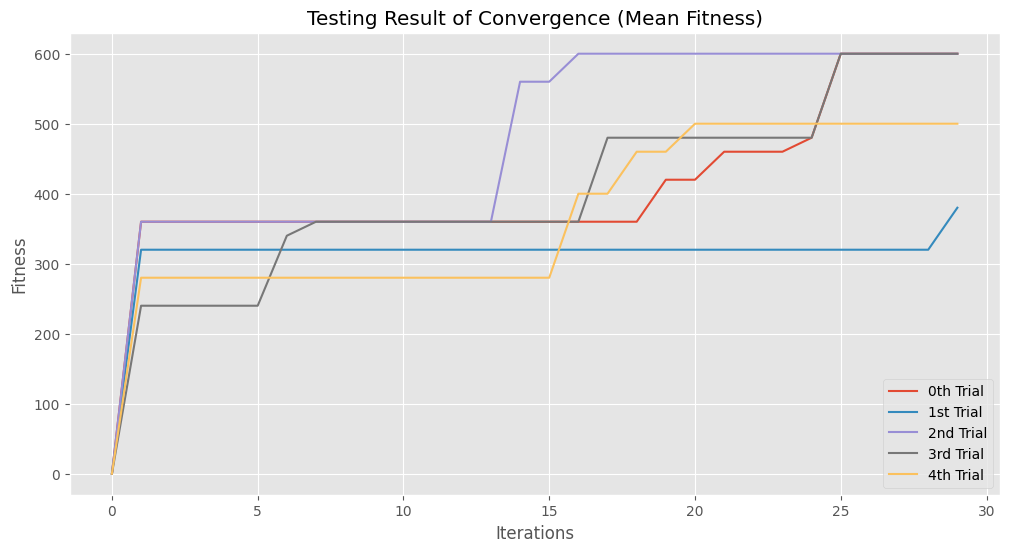

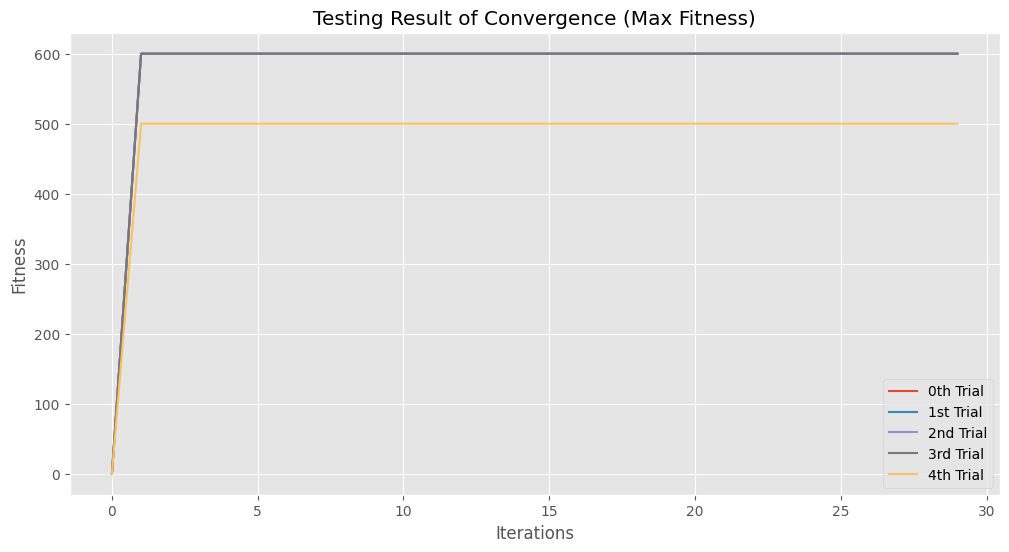

In [224]:
# Melakukan pengujian konvergensi PSO dengan FnMyIPSO_DLeLM_UjiKonv +
# Simpan hasil dalam csv dan grafik fitness dlm *.jpg
# 
# nCoba = 10
# IterMaxPSO = 500
# pop_size = 50

nCoba = 5
IterMaxPSO = 30
pop_size = 5

# get_Gbest_cell =np.zeros((nCoba,),dtype=np.object)
# kesetaraan cell dgn dict
get_all_Gbest_on_cell={}
get_all_FitnessGbest_on_cell={}
get_all_MeanFitness_on_cell={}
get_all_MaxFitness_on_cell={}

# get_best_of_the_best_from_all =np.zeros((nCoba,),dtype=np.object)
get_best_of_the_best_from_all={}

for i in range(nCoba):
  get_all_Gbest_on_cell[i],\
  get_all_FitnessGbest_on_cell[i],\
  get_all_MeanFitness_on_cell[i],\
  get_all_MaxFitness_on_cell[i] = \
  FnMyIPSO_DLeLM_UjiKonv(IterMaxPSO,pop_size,panjang_bit)

  #get best of the best from all Gbest (included fitness nya)
  # get_best_of_the_best_from_all[i]={}
  if i==0:
    get_best_of_the_best_from_all['Gbest'] = get_all_Gbest_on_cell[i]
    get_best_of_the_best_from_all['FitnessGbest'] = [get_all_FitnessGbest_on_cell[i]]
  else:
    if(get_best_of_the_best_from_all['FitnessGbest'][0] < get_all_FitnessGbest_on_cell[i]):
      get_best_of_the_best_from_all['Gbest'] = get_all_Gbest_on_cell[i]
      get_best_of_the_best_from_all['FitnessGbest'] = [get_all_FitnessGbest_on_cell[i]]

print()
print('Get best of the best from all Gbest (included fitness nya):')
print('-----'*20)
print('Gbest = ',get_best_of_the_best_from_all['Gbest'].round(0))
# print('Gbest dlm basis 10 = ',bool2int(get_best_of_the_best_from_all['Gbest'].astype(np.int)))
print()

# Decode Recomendasi Herbal
print("Decode Rekomendasi Herbal:")
theshold_score = 70
all_init_sub_fitness = []
for i_Herb in range(panjang_bit):
  if(get_best_of_the_best_from_all['Gbest'].round(0)[i_Herb]==1):
    init_sub_fitness = 0
    for j_gejala in range(len(gejala)):
      score_sort = process.extract(gejala[j_gejala], df_token.iloc[i_Herb,1], scorer=fuzz.token_set_ratio)
      init_sub_fitness += sum([x_[1] for x_ in score_sort if x_[1] > theshold_score])
    print(df_token.iloc[i_Herb,0],"(",str(init_sub_fitness),")"," ")
  all_init_sub_fitness.append(init_sub_fitness)

print()
print("Herbal dengan score tertinggi")
# a.index(max(a))
print(df_token.iloc[all_init_sub_fitness.index(max(all_init_sub_fitness)),0])

print()
print('FitnessGbest = ',get_best_of_the_best_from_all['FitnessGbest'][0].round(0))

print()

# ---------------------------------------------

# Buat Folder, dgn name_unik_path2save utk simpan hasil style transfer dan total loss-nya
name_unik_path2save = str(datetime.today().astimezone(pytz.timezone('Asia/Jakarta')).strftime('%d-%m-%Y-%H-%M-%S'))
# import os
# os.chdir("/content/drive/My Drive")
if not os.path.exists('./testing of convergence/'+name_unik_path2save):
  os.makedirs('./testing of convergence/'+name_unik_path2save)
  #print('Path blm ada')
else:
  print('Path sdh ada')
# os.chdir("/content/drive/My Drive/KeStar_Algorithm")
# !pwd

# set info_param
# nt mewakili parameter nCoba
# it mewakili parameter IterMaxPSO
# po mewakili pop_size
# gyf mewakili best of the best dari Gbest, lalu Fitness
info_param = 'nt-'+str(nCoba)+'-it-'+str(IterMaxPSO)+'-po-' \
+str(pop_size)+'-gyf'

nama_path_hasil = './testing of convergence/'+name_unik_path2save+'/'
nama_file_jpg_MeanFitness = nama_path_hasil+info_param+'_MeanFitness.jpg'
style.use('ggplot')
fig, ax = plt.subplots(figsize=(12, 6))    
plt.title("Testing Result of Convergence (Mean Fitness)")
plt.xlabel("Iterations")
plt.ylabel("Fitness")
# plt.xlim(1,IterMaxPSO)
# plt.xlim(1,len(get_all_MeanFitness_on_cell[0]))
for loss,lab in zip(get_all_MeanFitness_on_cell,np.arange(nCoba)):
  plt.plot(get_all_MeanFitness_on_cell[loss],label= humanize.ordinal(lab) +' Trial')
  # plt.legend(loc='upper right')
  plt.legend(loc='lower right')
plt.savefig(nama_file_jpg_MeanFitness,dpi=100)
plt.show()

print()

nama_file_jpg_MaxFitness = nama_path_hasil+info_param+'_Maxitness.jpg'
style.use('ggplot')
fig, ax = plt.subplots(figsize=(12, 6))    
plt.title("Testing Result of Convergence (Max Fitness)")
plt.xlabel("Iterations")
plt.ylabel("Fitness")
# plt.xlim(1,IterMaxPSO)
# plt.xlim(1,len(get_all_MeanFitness_on_cell[0]))
for loss,lab in zip(get_all_MaxFitness_on_cell,np.arange(nCoba)):
  plt.plot(get_all_MaxFitness_on_cell[loss],label= humanize.ordinal(lab) +' Trial')
  # plt.legend(loc='upper right')
  plt.legend(loc='lower right')
plt.savefig(nama_file_jpg_MaxFitness,dpi=100)
plt.show()

plt.style.use('default')

# Simpan Hasil Gbest Fitness , nantinya 'MeanFitness' dan 'MaxFitness' utk grafik evaluasi
nama_file_csv_GFY = nama_path_hasil+info_param+'_Gbest_FitnessGbest.csv'
# np.savetxt(nama_file_csv_GFY, get_best_of_the_best_from_all, fmt="%d", delimiter=",")
# np.savetxt('Gbest_FitnessGbest.csv', get_best_of_the_best_from_all, fmt="%d", delimiter=",")

nama_file_csv_MeanFitness= nama_path_hasil+info_param+'_MeanFitness.csv'
# np.savetxt(nama_file_csv_MeanFitness, get_all_MeanFitness_on_cell, fmt="%d", delimiter=",")
# np.savetxt('MeanFitness.csv', get_all_MeanFitness_on_cell, fmt="%d", delimiter=",")

nama_file_csv_MaxFitness= nama_path_hasil+info_param+'_MaxFitness.csv'
# np.savetxt(nama_file_csv_MaxFitness, get_all_MaxFitness_on_cell, fmt="%d", delimiter=",")
# np.savetxt('MaxFitness.csv', get_all_MaxFitness_on_cell, fmt="%d", delimiter=",")

# --------------------------
# untuk Gbest_FitnessGbest
# keys = sorted(get_best_of_the_best_from_all.keys())
transposed_data = list(zip_longest(*get_best_of_the_best_from_all.values()))
# with open('Gbest_FitnessGbest.csv', 'w', newline='') as f:
with open(nama_file_csv_GFY, 'w', newline='') as f:
  writer = csv.writer(f)
  writer.writerow(get_best_of_the_best_from_all.keys())
  # writer.writerow(keys)
  for items in transposed_data:
    writer.writerow(items)

# untuk MeanFitness
keys = sorted(get_all_MeanFitness_on_cell.keys())
rename_header=[]
for key in keys:
  rename_header.append(str(humanize.ordinal(int(key))) +' Trial')
transposed_data = list(zip_longest(*get_all_MeanFitness_on_cell.values()))
# with open('MeanFitness.csv', 'w', newline='') as f:
with open(nama_file_csv_MeanFitness, 'w', newline='') as f:
  writer = csv.writer(f)
  # coba rename header :D
  writer.writerow(rename_header)
  for items in transposed_data:
    writer.writerow(items)

# untuk MaxFitness
keys = sorted(get_all_MaxFitness_on_cell.keys())
rename_header=[]
for key in keys:
  rename_header.append(str(humanize.ordinal(int(key))) +' Trial')
transposed_data = list(zip_longest(*get_all_MaxFitness_on_cell.values()))
# with open('MaxFitness.csv', 'w', newline='') as f:
with open(nama_file_csv_MaxFitness, 'w', newline='') as f:
  writer = csv.writer(f)
  # coba rename header :D
  writer.writerow(rename_header)
  for items in transposed_data:
    writer.writerow(items)

In [ ]:
# ..